In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [41]:
iris_flower = pd.read_csv('iris.csv')
iris_flower.index = [i for i in range(1,151)]
iris_flower

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
iris_flower.shape

(150, 5)

In [43]:
iris_flower.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
iris_flower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [45]:
iris_flower.isna().any()

SepalLength    False
SepalWidth     False
PetalLength    False
PetalWidth     False
Species        False
dtype: bool

In [46]:
iris_flower.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [47]:
iris_flower.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [48]:
iris_flower['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [49]:
iris_flower['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [50]:
colors = []
for index in iris_flower['Species'].unique():
    if index=='Iris-setosa':
        colors.append("purple")
    elif index=='Iris-versicolor':
        colors.append("violet")
    else:
        colors.append("black")
print(colors)

['purple', 'violet', 'black']


<Axes: xlabel='Species', ylabel='Total no. of Species'>

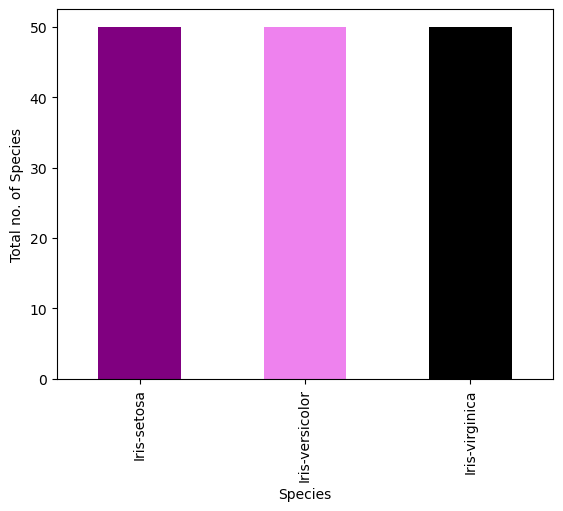

In [51]:
iris_flower['Species'].value_counts().plot(kind="bar",color=colors,xlabel="Species",ylabel="Total no. of Species")

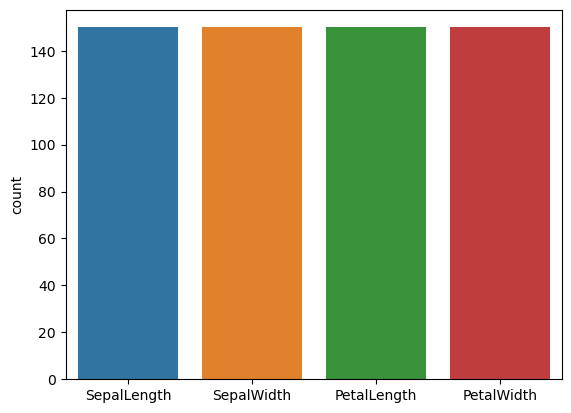

In [52]:
sns.countplot(data=iris_flower)
plt.show()

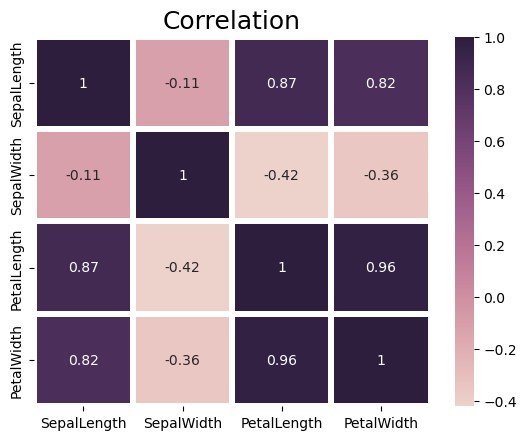

In [53]:
sns.heatmap(iris_flower.corr(),linewidth=4,annot=True,cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation",size=18)
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder

iris_flower['Species'] = LabelEncoder().fit_transform(iris_flower['Species'])

In [55]:
iris_flower['Species'].unique()

array([0, 1, 2])

In [56]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(iris_flower.loc[:,'SepalLength':'PetalWidth'],iris_flower.loc[:,'Species'],train_size=80,test_size=20)

In [57]:
Xtrain.sort_index().shape

(80, 4)

In [58]:
Xtest.sort_index().shape

(20, 4)

In [59]:
Ytrain.sort_index().shape

(80,)

In [60]:
Ytest.sort_index().shape

(20,)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

# Model Selection

In [62]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [63]:
logReg= LogisticRegression()
logReg.fit(Xtrain, Ytrain)

LogisticRegression()

In [64]:
log_prediction=logReg.predict(Xtest)
log_prediction

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2])

In [65]:
print("Logistic Model Accuracy:")
accuracy_score(Ytest, log_prediction)

Logistic Model Accuracy:


0.95

In [66]:
confusion_matrix(Ytest,log_prediction)

array([[3, 0, 0],
       [0, 8, 1],
       [0, 0, 8]], dtype=int64)

In [67]:
print(classification_report(Ytest,log_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.89      0.94         9
           2       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.96      0.96      0.96        20
weighted avg       0.96      0.95      0.95        20



In [68]:
from sklearn.tree import DecisionTreeClassifier

Dtc = DecisionTreeClassifier(criterion="entropy",max_depth=5)
Dtc.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [69]:
dtc_prediction = Dtc.predict(Xtest)

In [70]:
print("Decision Tree Model Prediction: ")
accuracy_score(Ytest,dtc_prediction)

Decision Tree Model Prediction: 


0.95

In [71]:
confusion_matrix(Ytest,dtc_prediction)

array([[3, 0, 0],
       [0, 8, 1],
       [0, 0, 8]], dtype=int64)

In [72]:
print(classification_report(Ytest,dtc_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.89      0.94         9
           2       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.96      0.96      0.96        20
weighted avg       0.96      0.95      0.95        20



In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,algorithm="auto")

In [74]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [75]:
knn_prediction= knn.predict(Xtest)
knn_prediction

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2])

In [76]:
print("KNN Model Accuracy: ")
accuracy_score(Ytest,knn_prediction)

KNN Model Accuracy: 


1.0

In [77]:
confusion_matrix(Ytest,knn_prediction)

array([[3, 0, 0],
       [0, 9, 0],
       [0, 0, 8]], dtype=int64)

In [78]:
print(classification_report(Ytest,knn_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### Logistic Regression Accuracy: 0.95 / 1.0 (95%)

#### Decision Tree Accuracy: 0.95 / 1.0 (95%)

#### KNN Accuracy: 1.0 / 1.0 (100%)